# Life Expectancy and GDP Analysis

## Understand the problem

- As defined [here](https://www.researchgate.net/topic/Life-Expectancy), *Life Expectancy* is a figure representing the number of years, based on known statistics, to which any person of a given age may reasonably expect to live. 

- As defined [here](https://towardsdatascience.com/life-expectancy-vs-gross-domestic-product-using-data-analyticsbc0d5c78043f#:~:text=The%20relationship%20is%20evident%20but,between%20GDP%20and%20Life%20expectancy), *Gross Domestic Product (GDP)* is the overall monetary or consumer value of all finished goods and services produced within the boundaries of a nation over a given period. It acts as a large measure of overall domestic output, as a detailed scorecard of the economic health of the country. GDP is measured in US dollars.

## Goal

In this project, we will analyze data on Life Expectancy at Birth (years) (LEABY) and Gross Domestic Product (GDP) from the [World Health Organization](http://apps.who.int/gho/data/node.main.688) and the [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) to try to identify the relationship between the GDP and LEABY of six countries (Chile, China, Germany, Mexico, United States of America, Zimbabwe) over fifteen years.

During this project, we will analyze, prepare, and plot data in order to answer in a meaningful way some questions such as:

- Does higher GDP mean higher LEABY?
- How does the LEABY vary in average by country from 2000 to 2015?
- How does the GDP vary in average  by country from 2000 to 2015?
- Is a correlation between GDP and LEABY for the countries from 2000 to 2015?

**Data sources**

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)
- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.


## Action

- Import Python librairies
- Load in the dataset
- Check for data information
- Explore the LEABY per country from 2000 to 2015
- Explore tthe GDP per country from 2000 to 2015
- Visualize the correlation between LEAB and GDP from 2000 to 2015


## Conclusion

- Analyse our findings
- Conclude

## Import Python libraires

In [28]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

Let's load in and inspect few rows of the dataset.

In [29]:
#load in the data
df = pd.read_csv("all_data.csv")

#inspect few rows of the data
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Before moving in, let's alter the column variable name ```"Life expectancy at birth (years)"``` to ```"LEABY"```

In [30]:
df.columns=["Country","Year","LEABY", "GDP"]
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Data Information

In [31]:
#check information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   LEABY    96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [32]:
#check for categorical variables
df['Country'].unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [33]:
df['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [34]:
#get a quick collection of numerical summaries of the data
df.describe(include = 'all')

,Country,Year,LEABY,GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


In [35]:
#get a collection of the average LEABY and GDP by country.

In [36]:
df_means = df.set_index("Year").groupby("Country").mean().reset_index(inplace =False)
df_means

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


## In deep data exploration

### Spread of LEABY  and GDP from 2000 to 2015

Looking at the names of the columns, The four column names are ```Country```,```Year```, ```"Life expectancy at birth (years)"```, and ```"GDP"```.

In addition to the life expectancy, the information about the wealth of each country is also included. We’ll use this information later! 

Right now, let’s isolate the column that contains the life expectancy and store it in a variable named ```Life expectancy  at birth (years)```. 

In [37]:
leaby = df['LEABY']
leaby.head()

0    77.3
1    77.3
2    77.8
3    77.9
4    78.0
Name: LEABY, dtype: float64

#### Find the Quantiles

Next, we'll find the quartiles of LEAB, store the result in a variable named ```leaby_quartiles```, and print the results.

In [38]:
leaby_quartiles = np.quantile(leaby, [0.25, 0.5, 0.75])
leaby_quartiles

array([74.475, 76.75 , 78.9  ])

This result confirm the quartiles of LEABY in the previous quick collection of numerical summaries of the data.

By looking at those three values we can get a sense of the spread of the data. For example, it seems like the data is  some of the data is fairly equally spread:
— a first quarter of the data is between ```44.30``` years and ```74.47``` years.
— a second quarter of the data is between ```74.47``` years and ```76.75``` years.
— a third quarter of the data is between ```76.75``` years and ```78.9``` years.
— a last quarter of the data is between ```78.9``` years and ```81.0``` years.
This data distribution looks like most of the data are together between the second quarter ```74.47``` years and the last quarter ```78.9``` years.
Could we predict what the histogram might look like from those three number? Let's plot the histogram by using the following lines of code. Does it look how we expected?

#### Visualizing the graph of LEABY

C:\Users\dsali\Anaconda3\envs\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


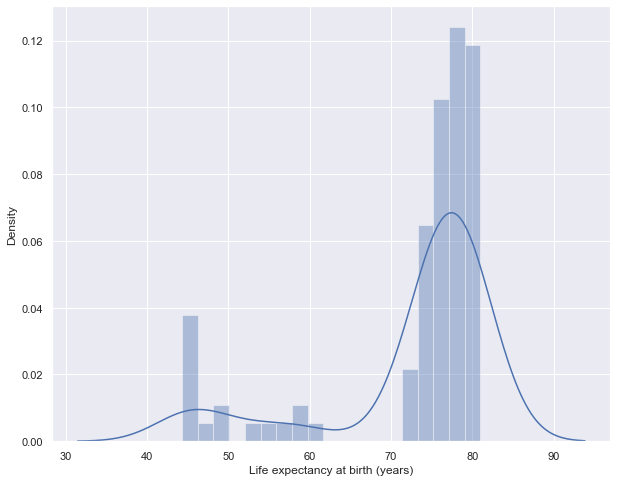

In [39]:
plt.figure(figsize=(10,8))
sns.distplot(leaby)
plt.xlabel("Life expectancy at birth (years)")
plt.show()

As shown, the graph of LEABY is left-skewed. That explains that most of the data are together between the second quarter ```74.47``` years and the last quarter ```78.9``` years.

#### Splitting the Data by GDP

**GDP is a mesaure of a country’s wealth**. Let’s now use the GDP data to see if life expectancy is affected by this value.

Let’s split the data into two groups based on GDP. If we find the median GDP, we can create two datasets for ```“low GDP countries”``` and ```“high GDP countries"```.

To start, let’s isolate the GDP column and store it in a variable named ```gdp```. 

In [40]:
gdp = df['GDP']
gdp.head()

0    7.786093e+10
1    7.097992e+10
2    6.973681e+10
3    7.564346e+10
4    9.921039e+10
Name: GDP, dtype: float64

We now want to find the median GDP to confirm the one we got in the previous quick collection of numerical summaries of the data.

In [41]:
median_gdp = np.quantile(gdp, 0.5)
median_gdp

1280220000000.0

Now, let’s grab all of the rows from our original dataset that have a GDP less than or equal to the median. 

In [42]:
low_gdp = df[df['GDP'] <= median_gdp]
low_gdp.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


We see that China had low GDP in only in 2000 while Chile, Mexico and Zimbabwe had low GDP over the fifteen years.

Also, let’s grab all of the rows from our original dataset that have a GDP greater than the median.

In [43]:
high_gdp = df[df['GDP'] > median_gdp]
high_gdp.head()

,Country,Year,LEABY,GDP
17,China,2001,72.2,1.339400e+12
18,China,2002,72.7,1.470550e+12
19,China,2003,73.1,1.660290e+12
20,China,2004,73.5,1.955350e+12
21,China,2005,73.9,2.285970e+12


We see that Germany had the highest LEAB over the fifteen years followed by United States of America and China.

Now that we’ve split the data based on the GDP, let’s see how the life expectancy of each group is distributed compares to each other.

In [44]:
#Find the quartiles of the "Life Expectancy" column of low_gdp.
low_gdp_quartiles = np.quantile(low_gdp["LEABY"], [0.25, 0.5, 0.75])
print(low_gdp_quartiles)

[56.175 75.6   77.925]


It seems like some of the data is fairly together betwen 75.6 (years) and 77,92(years)

In [45]:
#Find the quartiles of the "Life Expectancy" column of high_gdp.
high_gdp_quartiles = np.quantile(high_gdp["LEABY"], [0.25, 0.5, 0.75])
print(high_gdp_quartiles)

[75.55  78.05  79.125]


####  Comparison of the LEABY  on both wealth groups

By looking at the quantiles, we should get a sense of the spread and central tendency of these two datasets. But let’s plot a histogram of each dataset to really compare them.

C:\Users\dsali\Anaconda3\envs\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dsali\Anaconda3\envs\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


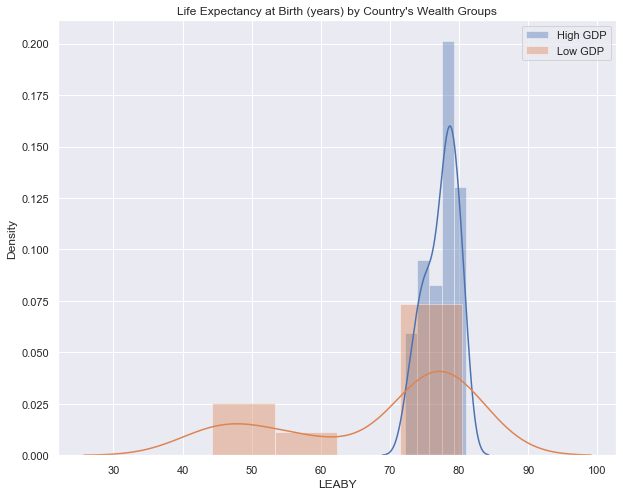

In [46]:
plt.figure(figsize=(10,8))
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

sns.distplot(high_gdp["LEABY"], label= "High GDP")
sns.distplot(low_gdp["LEABY"], label="Low GDP")
plt.title("Life Expectancy at Birth (years) by Country's Wealth Groups")
plt.legend() 
plt.show()


We can see that all the countries with "high GDP"  have high LEABY but many countries with "low GDP" also have high LEABY.

Now, let's create a barplot of the average LEABY of the nations over time.

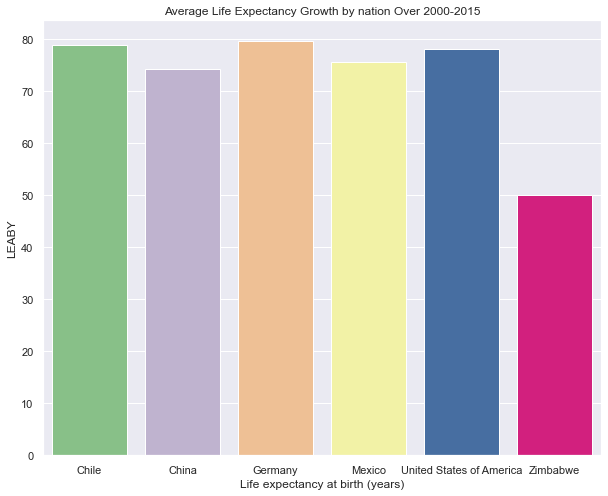

In [47]:
# Create a bar plot of the country variable relative to LEABY
plt.figure(figsize=(10,8))
sns.barplot(x="Country", y="LEABY", data=df_means,  palette = "Accent")
plt.title("Average Life Expectancy Growth by nation Over 2000-2015")
plt.xlabel("Life expectancy at birth (years)");

This plot shows that all of the countries except Zimbabwe have the average growth  in the mid-to-high 70s. In the following plot, we'll explore in deep the variations of the life expectancy at birth (years) of each country over the fifteen years using seaborn.FacetGrid() function.

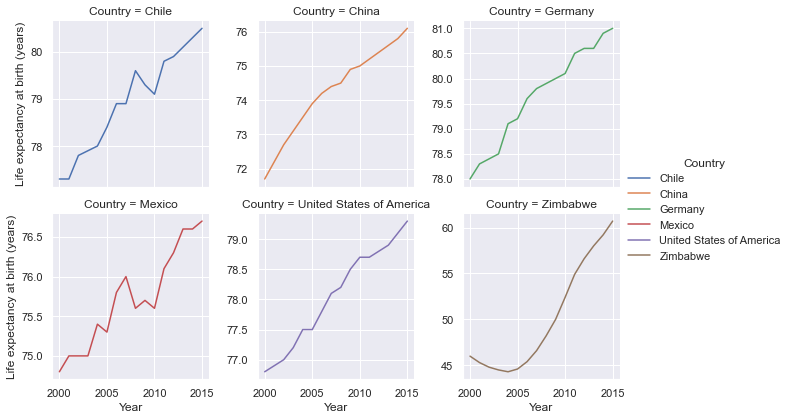

In [48]:

g_LEABY = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

g_LEABY = (g_LEABY.map(sns.lineplot,"Year","LEABY")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))
g_LEABY;


This figure shows the growth of the Life expectancy at birth (year) in Chile, China, Germany, Mexico, United States of America, and in Zimbabwe from 2000 to 2015.

From 2000 to 2004 the LEABY of Zimbabwe decreased little by little from 46.0s to 44.3s before it began to increase steeply until 2015 where it reached 60.7s.

In 2000 the LEABY of Chile was 77.3s and this number remained constant until 2001. From that time on, its LEABY went up gradually and it reached 79.6s in 2008. Between 2008 and 2010 there was a slight drop to 79.1s before the increase happened quickly, and it reached 79.8s in 2011. From that time, it continued to grow until 2015.

There was a little increase in the LEABY of Mexico from 74.8s in 2000 to 75.0s in 2001. Then, it remained steady at 75.0s between 2001 and 2003. Between 2003 and 2007 it peaked at 76.1s. In 2008 it felt the LEABY felt rapidly to 75.6. It fluctuated between 2008 and 2011 before it started to increase gradually until 2015.

While the LEABY of China increased sharply from 71.7s in 2000 to 76.1s in 2015, the LEABY of Germany and USA increased significantly respectively from 78.0 in 2000 to 81.0s in 2015 and from 76.8 in 2000 to 79.3s in 2015.

Overall, there was an increase of the Life expectancy at birth (year) for all the nations. Germany had the highest LEABY. The USA had the second largest LEABY followed by Chile, Mexico, China, and Zimbabwe in 2015.


Now, let's explore the distribution of the GDP

C:\Users\dsali\Anaconda3\envs\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


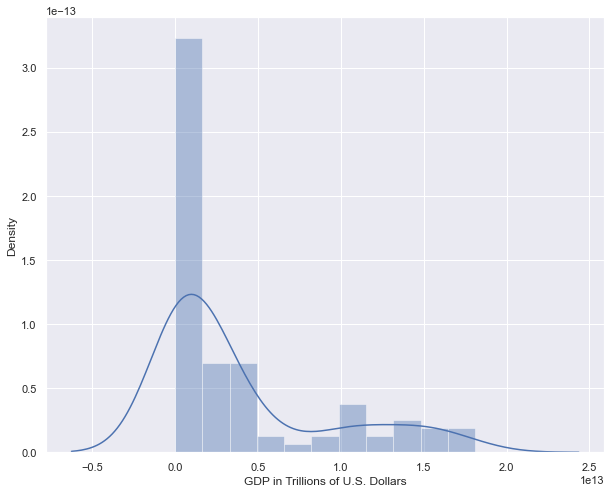

In [49]:
plt.figure(figsize=(10,8))
sns.distplot(df["GDP"])
plt.xlabel("GDP in Trillions of U.S. Dollars");

As we can see the GDP is right-skewed in opposition of the LEABY.

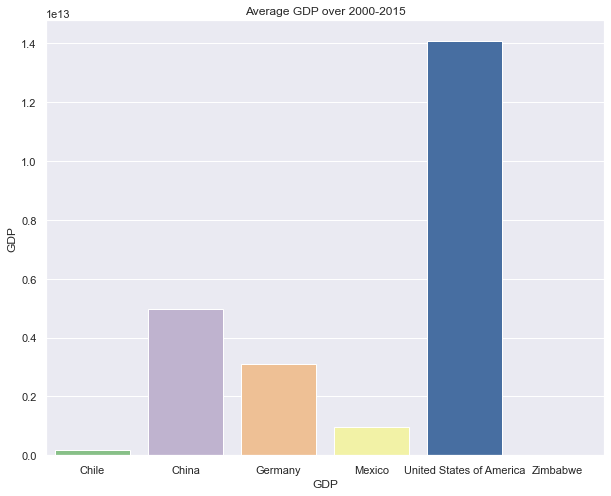

In [50]:
# Create a bar plot of the country variable relative to GDP
plt.figure(figsize=(10,8))
sns.barplot(x="Country", y="GDP", data=df_means,  palette = "Accent")
plt.title("Average GDP over 2000-2015")
plt.xlabel("GDP");

This plot shows the average GDP of all the countries except Zimbabwe. The United States of America had the largest average GDP. China had the second largest followed by Germany, Mexico, and Chile.

Next, we'll explore in deep the variations of the GDP of each country over the fifteen years using seaborn.FacetGrid() function.

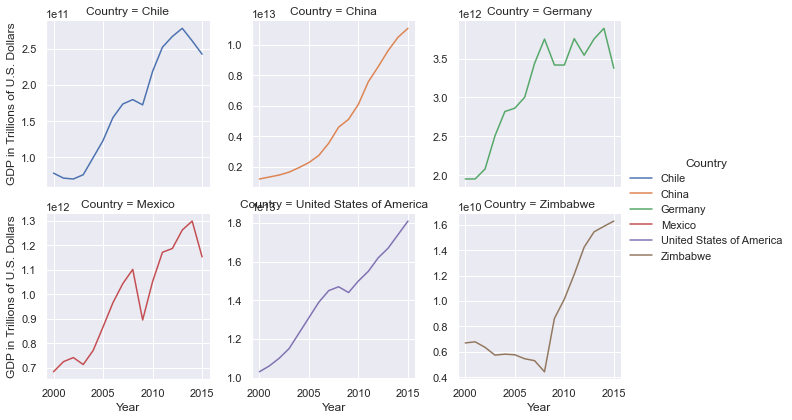

In [51]:
g_GDP = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

g_GDP = (g_GDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

g_GDP;

This figure shows the graph of GDP of the six nations over 2000 – 2015.

The GDP of Chile reached its lowest point between 2000 and 2003 and it went up significantly between 2003 and 2007. Between 2007 and 2009 there was a little drop before it started to increase sharply and peaked at almost 2.7 T in 2013 but it plunged considerably around 2.4 T in 2015.

The GDP of Mexico fluctuated from 0.7 T in 2000 to 0.8 T in 2004 and it increased sharply to reach 1.1 T between 2007 and 2008, but it plunged dramatically to 0.9 T between 2008 and 2009. From that time, it went up sharply and reached a peak at1.3 T between 2013 and 2014 but it fell dramatically below 1.2 T in 2015.

With its lowest at 0.2 T in 2000, the GDP of China increased sharply and peaked around 1.2 T in 2015.
The GDP of the United States of America climbed sharply from 1.0 T in 2000 to around 1.5 T in 2008, but it dropped slightly between 2008 and 2009. Next, it boomed to reach a peak at 1.8 T in 2015.

The GDP of Germany increased vastly from 2.0 T in 2000 to around 3.7 in 2008. From that time, it fluctuated before it peaked at 3.9 T in 2014, but it fell steeply to 3.4 in 2015.

The GDP of Zimbabwe decreased steadily 0.7 T in 2000 to its lowest 0.4 T in 2008, but it rose sharply and peaked at 1.6 T in 2015.

Overall, there was an increase in GDP of all the nations from 2000 to 2015 except Zimbabwe for which the boom happened only from 2008 to 2015.


## Visualizing the correlation between GDP and Life expectancy at birth (years)

We will use seaborn.FacetGrid() function that takes in a function and creates individual graphs for which you specify the arguments. In order to examine the correlation between GDP and Life expectancy at birth (years), let’s see the facet grid of scatter graphs, mapping GDP as a function of Life expectancy at birth (years) by country. Below are the matplotlib scatter plots for the plot (LEABY vs GDP)

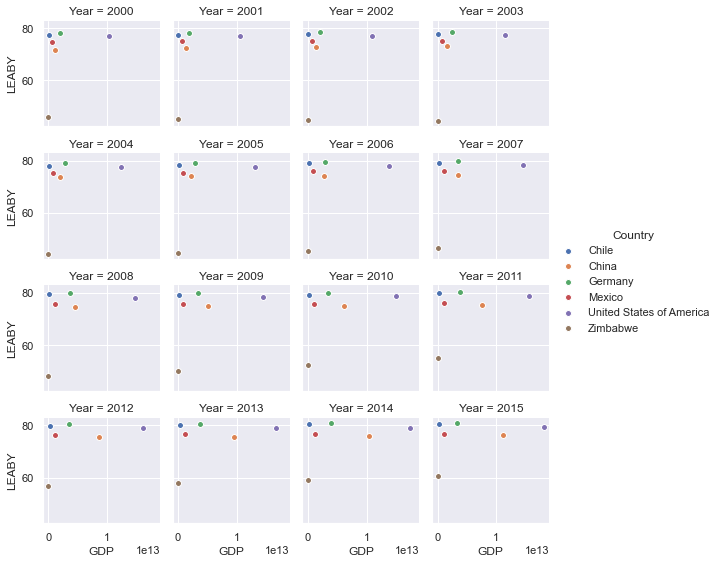

In [52]:
# Form a facetgrid using columns with a hue
gh = sns.FacetGrid(df, col ='Year',  hue ='Country', col_wrap=4, height=2)
# map the above form facetgrid with some attributes
gh=(gh.map(plt.scatter, 'GDP', 'LEABY', edgecolor="w").add_legend());
# show the object
plt.show()

From this figure, we can see changes in LEABY vs GDP of the countries over the fifteen years. No noticeable change in the correlation of LEABY vs GDP for Chile, Mexico, China, and Germany could be discerned, but the GDP of China and Germany started to move off along the x-axis which means that their GDP went up. From 2003 t0 2015, China and the United States are the countries with GDP that have mostly moved onward along the x-axis: their GDP was considerably increased over that period. Whereas, the GDP of Zimbabwe had mostly moved upward along the y-axis which means that life expectancy at birth (year) in this country had increased sharply over time. Moreover, Life expectancy at birth (year) in Chile and Mexico remained constant for the fifteen years. Lastly, for Germany, both GDP and at Life expectancy at birth (year) move slightly over the fifteen years.

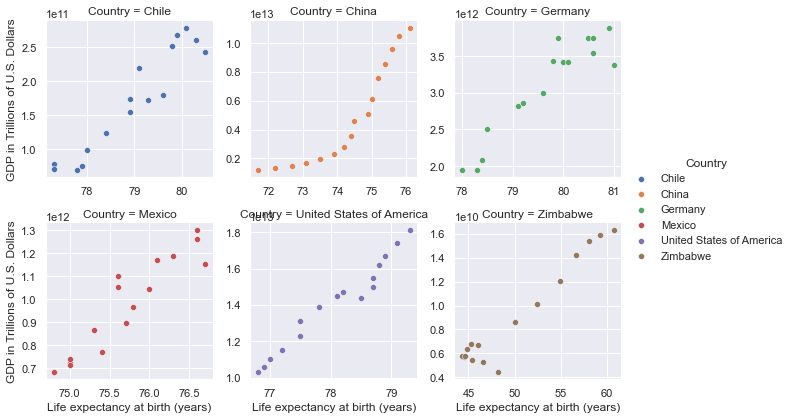

In [53]:
gh = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
gh = (gh.map(sns.scatterplot,"LEABY", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));

As can see, this plot shows positve correlation between LEABY and GDP for all the countries.

Finally,  using a violin plot let's visualize the shape of the distribtion patterns of Life expectancy at birth (year) and GDP by nation from 2000 to 2015.

Text(0.5, 0, 'GDP in Trillions of U.S. Dollars')

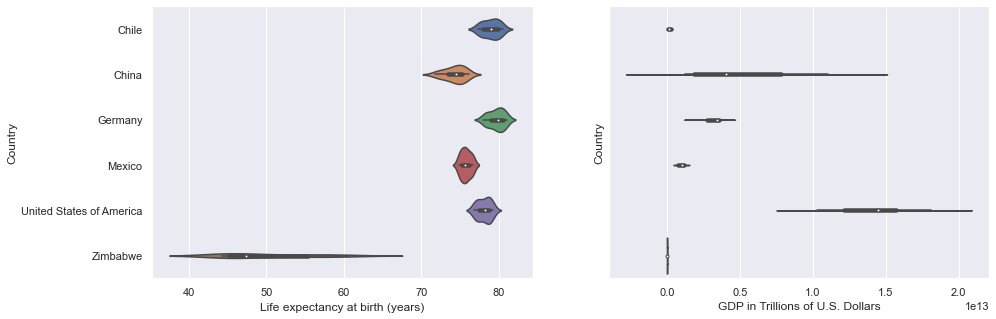

In [54]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
ax[0] = sns.violinplot(ax=ax[0], x=df.LEABY, y=df.Country)
ax[0].set_xlabel("Life expectancy at birth (years)");
ax[1] = sns.violinplot(ax=ax[1], x=df.GDP, y=df.Country)
ax[1].set_xlabel("GDP in Trillions of U.S. Dollars")


This violin plot shows the shape of the distribution patterns of LEABY and GDP. Country is on the y-axis and LEABY and GDP are on the x-axis.

In the LEABY chart on the left, many countries had shorter distribution shape spans, except for Zimbabwe, which had a scale from high 30 to the high 60.

Whereas, in the GDP chart on the right, the distribuution shape of China and the United States had relatively wide reach, while Zimbabwe, Chile, and Mexico had shorter reach.

## Conclusion

With the development of this project, we learned some aspects of the relationship of life expectancy and GDP from data visualizations. Even though the data we utilized was not quite big, it helped us to get insight in the non-obvious relationship between life expectancy and GDP of the six nations from 2000 to 2015. Also, the development of this project gave responses to some questions asked at the top beginning.

- Does higher GDP mean higher LEABY?
    - No, we saw that all the countries with high GDP have high LEABY but many countries with high LEABY also had low GDP. For example, Chile and Mexico have low GDP but they have high LEABY (years) almost equal to the one USA had. Even though their GDP was not increasing at the same rate as USA and China, they still have high LEABY (years). Likewise, Germany that had the highest LEABY over the fifteen years had a fluctuated GDP lower than the GDP of the USA. Therefore, it seems that the relationship between GDP and Life expectancy at birth (years) was not so evident.    
- How does the LEABY vary in average by country over fifteen years?
    - In general, there was an increase of the Life expectancy at birth (year) for all the nations. Germany had the highest LEABY. Chile had the second largest LEABY followed the USA, Mexico, China, and Zimbabwe in 2015.  In fact, the average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50 even though this nation had the highest rise in LEABY.
- How does the GDP vary in average by country over fifteen years?
    - Overall, the United States of America had the largest average GDP. China had the second largest followed by Germany, Mexico, and Chile. Whereas, in terms of growth, there was an increase in GDP for all the nations particularly for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes, there is a positive correlation between GDP and life expectancy for all the nations in our study.

All in all, this project demonstrates that LEABY and GDP were in growth and the correlation between them was positive for each country in our list from 2000 t0 2015. That was great benefits for the nations. Unfortunately, rising GDP hasn’t always been linked with prosperous life expectancy as shown in this [World Economic Forum article](https://www.weforum.org/agenda/2016/10/the-relationship-between-gdp-and-life-expectancy-isnt-as-simple-as-you-might-think).